In [2]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/zalando-research/fashionmnist")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: indust
Your Kaggle Key: ········


100%|██████████████████████████████████████| 68.8M/68.8M [00:40<00:00, 1.79MB/s]


In [4]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [ ]:
training_data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')

train_y = training_data['label']
train_X = training_data.drop('label',axis=1)

test_data = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')

test_y = test_data['label']
test_X = test_data.drop('label',axis=1)


svc = SVC(gamma='scale',kernel='rbf',C=8)

cv_results = cross_validate(svc, train_X, train_y, cv=3)

print(f"Validation acc for each fold: {cv_results['test_score']}")
print(f"Mean acc:  {mean(cv_results['test_score'])}")

In [ ]:
training_data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')

train_y = training_data['label']
train_X = training_data.drop('label',axis=1)

test_data = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')

test_y = test_data['label']
test_X = test_data.drop('label',axis=1)


svc = SVC(gamma='scale',kernel='rbf',C=8)

cv_results = cross_validate(svc, train_X, train_y, cv=3)

print(f"Validation acc for each fold: {cv_results['test_score']}")
print(f"Mean acc:  {mean(cv_results['test_score'])}")

In [ ]:
training_data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')

train_y = training_data['label']
train_X = training_data.drop('label',axis=1)

test_data = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')

test_y = test_data['label']
test_X = test_data.drop('label',axis=1)


svc = SVC(gamma='scale',kernel='rbf',C=8)

cv_results = cross_validate(svc, train_X, train_y, cv=3)

print(f"Validation acc for each fold: {cv_results['test_score']}")
print(f"Mean acc:  {mean(cv_results['test_score'])}")

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

training_data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')

train_y = training_data['label']
train_X = training_data.drop('label',axis=1)

test_data = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')

test_y = test_data['label']
test_X = test_data.drop('label',axis=1)


# Cross validation ----------------------------------------------------------
folds = KFold(n_splits=3)

acc = list()

#run model
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_X,train_y)):
	strLog = "fold {}".format(fold_)
	print(strLog)

	X_tr, X_val = train_X.iloc[trn_idx], train_X.iloc[val_idx]
	y_tr, y_val = train_y.iloc[trn_idx], train_y.iloc[val_idx]

	pca = PCA(n_components=400)
	pca.fit(X_tr)
	pca_tr_X = pca.transform(X_tr)
	pca_val_X = pca.transform(X_val)

	svc = SVC(gamma='scale',kernel='rbf',C=8)

	svc.fit(pca_tr_X,y_tr)
	preds = svc.predict(pca_val_X)

	acc.append(accuracy_score(preds,y_val))

print(f"Validation acc for each fold: {acc}")
print(f"Mean acc:  {mean(acc)}")

pca = PCA(n_components=400)
pca.fit(train_X)
pca_train_X = pca.transform(train_X)
pca_test_X = pca.transform(test_X)

svc = SVC(gamma='scale',kernel='rbf',C=8)

svc.fit(train_X,train_y)

preds = svc.predict(test_X)

print(f"Test acc {accuracy_score(preds,test_y)}")

In [ ]:
training_data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')

train_y = training_data['label']
train_X = training_data.drop('label',axis=1)

data_amounts = [1000,5000,10000,15000,20000]

accs = list()

# # data_amounts = [300,301]

plt.figure(figsize=(12,6))

for data_amt in data_amounts:

    # We use default parameters of SVM
    svc = SVC(gamma='scale',kernel='rbf',C=1)

    cv_results = cross_validate(svc, train_X[:data_amt], train_y[:data_amt], cv=2)

#     print(f"Validation acc for each fold: {cv_results['test_score']}")
    print(f"Mean acc:  {mean(cv_results['test_score'])}")

    accs.append(mean(cv_results['test_score']))


plt.legend()
plt.title('Accuracy by amount of data')
plt.xlabel('Amount of data')
plt.ylabel('Accuracy')

plt.plot(data_amounts, accs, '-o')

plt.tight_layout()
plt.show()

# plt.savefig("result.png")

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2; 2/48] START C=0.01, gamma=scale, kernel=poly...........................
[CV 1/2; 2/48] END C=0.01, gamma=scale, kernel=poly;, score=-0.783 total time= 5.2min
[CV 1/2; 14/48] START C=0.1, gamma=auto, kernel=poly............................
[CV 1/2; 14/48] END C=0.1, gamma=auto, kernel=poly;, score=-0.563 total time= 1.2min
[CV 1/2; 17/48] START C=1, gamma=scale, kernel=linear...........................
[CV 1/2; 17/48] END C=1, gamma=scale, kernel=linear;, score=-0.525 total time= 1.6min
[CV 2/2; 19/48] START C=1, gamma=scale, kernel=rbf..............................
[CV 2/2; 19/48] END C=1, gamma=scale, kernel=rbf;, score=-0.393 total time= 2.1min
[CV 2/2; 22/48] START C=1, gamma=auto, kernel=poly..............................
[CV 2/2; 22/48] END C=1, gamma=auto, kernel=poly;, score=-0.558 total time= 1.3min
[CV 2/2; 26/48] START C=10, gamma=scale, kernel=poly............................
[CV 2/2; 26/48] END C=10, gamm

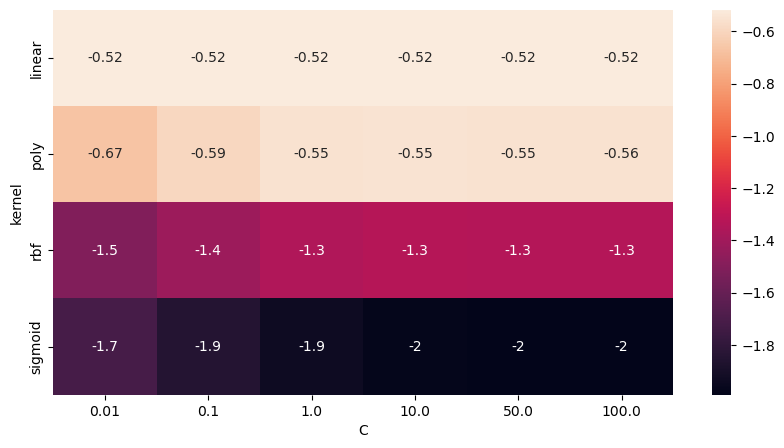

In [2]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")


data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')[:14000]

y = data['label']

X = data.drop('label',axis=1)


params = {
		  'C': [0.01,0.1,1,10,50,100],
		  'kernel': ['linear','poly','rbf','sigmoid'],
		  'gamma':['auto']
		 }

svc = SVC(**params, probability=True)

cv = KFold(n_splits=2)

clf = GridSearchCV(svc, param_grid=params, scoring='neg_log_loss', n_jobs=-1, cv=cv, verbose=10)
clf.fit(X, y)

print(clf.cv_results_['mean_test_score'])

C = [clf.cv_results_['params'][i]['C'] for i in range(len(clf.cv_results_['params']))]
kernel = [clf.cv_results_['params'][i]['kernel'] for i in range(len(clf.cv_results_['params']))]

score = clf.cv_results_['mean_test_score']

results = pd.DataFrame({'C':C,'kernel':kernel,'score':score})


results = pd.pivot_table(results, values='score', 
                      index=['kernel'], 
                      columns='C')


# Visualize results by heat map

import seaborn as sns

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(results, annot=True)

# plt.savefig('svc_param_tuning.png')

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[-0.51735444 -0.77532977 -0.71556005 -1.16924548 -0.51748105 -0.62607972
 -0.5299215  -1.40220645 -0.51729373 -0.54314474 -0.39214745 -1.56865571
 -0.51812145 -0.53776644 -0.35484277 -1.65613867 -0.51754141 -0.5458108
 -0.36583087 -1.68048158 -0.5173177  -0.54925184 -0.3665656  -1.69951735]


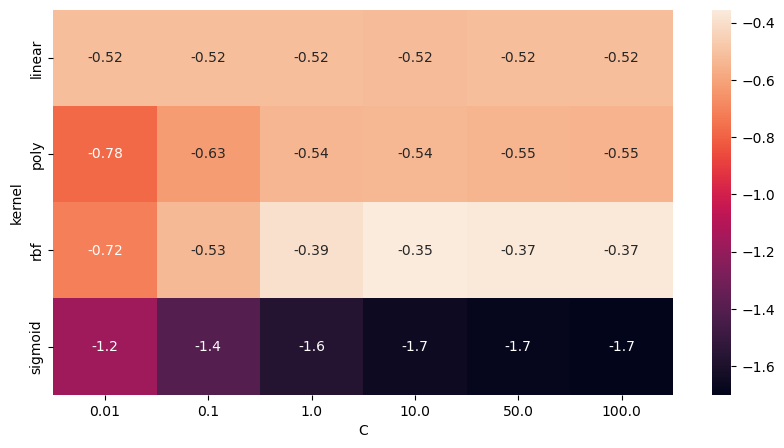

In [8]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")


data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')[:14000]

y = data['label']

X = data.drop('label',axis=1)


params = {
		  'C': [0.01,0.1,1,10,50,100],
		  'kernel': ['linear','poly','rbf','sigmoid'],
		  'gamma':['scale']
		 }

svc = SVC(**params, probability=True)

cv = KFold(n_splits=2)

clf = GridSearchCV(svc, param_grid=params, scoring='neg_log_loss', n_jobs=-1, cv=cv, verbose=10)
clf.fit(X, y)

print(clf.cv_results_['mean_test_score'])

C = [clf.cv_results_['params'][i]['C'] for i in range(len(clf.cv_results_['params']))]
kernel = [clf.cv_results_['params'][i]['kernel'] for i in range(len(clf.cv_results_['params']))]

score = clf.cv_results_['mean_test_score']

results = pd.DataFrame({'C':C,'kernel':kernel,'score':score})


results = pd.pivot_table(results, values='score', 
                      index=['kernel'], 
                      columns='C')


# Visualize results by heat map

import seaborn as sns

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(results, annot=True)

# plt.savefig('svc_param_tuning.png')


In [11]:
training_data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')

train_y = training_data['label']
train_X = training_data.drop('label',axis=1)

test_data = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')

test_y = test_data['label']
test_X = test_data.drop('label',axis=1)

In [12]:
from sklearn.decomposition import PCA

def check_PCA(X):
    pca = PCA().fit(X)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    return pca

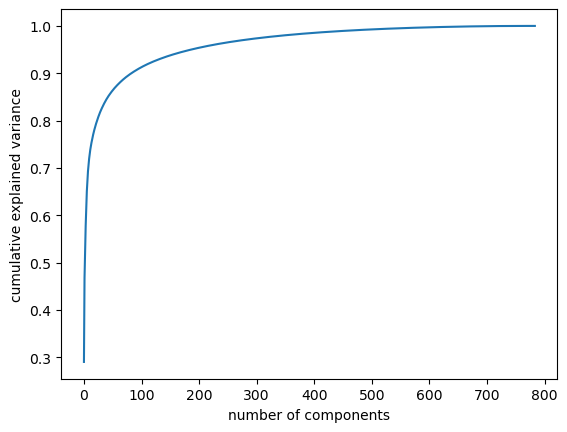

In [13]:
pca = check_PCA(train_X)

In [14]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
index_list = []
for index,value in enumerate(cum_var):
    if value >= 0.95:
        index_list.append(index)

In [15]:
from sklearn.metrics import accuracy_score

def PCA_train(components, train_X, train_y, n_splits):
    # Cross validation ----------------------------------------------------------
    folds = KFold(n_splits)

    acc = list()
    
    #run model
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_X,train_y)):
        strLog = "fold {}".format(fold_)
        #print(strLog)
    
        X_tr, X_val = train_X.iloc[trn_idx], train_X.iloc[val_idx]
        y_tr, y_val = train_y.iloc[trn_idx], train_y.iloc[val_idx]
    
        pca = PCA(components)
        pca.fit(X_tr)
        pca_tr_X = pca.transform(X_tr)
        pca_val_X = pca.transform(X_val)
    
        svc = SVC(gamma='scale',kernel='rbf',C=8)
    
        svc.fit(pca_tr_X,y_tr)
        preds = svc.predict(pca_val_X)
    
        acc.append(accuracy_score(preds,y_val))
#    print(f"Validation acc for each fold: {acc}")
#    print(f"Mean acc:  {mean(acc)}")
    return acc

def PCA_test(components, train_X, train_y, test_X, test_y):
    pca = PCA(n_components=400)
    pca.fit(train_X)
    pca_train_X = pca.transform(train_X)
    pca_test_X = pca.transform(test_X)

    svc = SVC(gamma='scale',kernel='rbf',C=8)

    svc.fit(train_X,train_y)

    preds = svc.predict(test_X)
    #print(f"Test acc {accuracy_score(preds,test_y)}")
    return preds

In [ ]:
n_splits = 3
pca_train =[]
pca_test =[]
for components in index_list:
    pca_train.append(PCA_train(components, train_X, train_y, n_splits))
    pca_test.append(PCA_test(components, train_X, train_y, test_X, test_y))